# Making Predictions with Logistic Regression in PyTorch

How to make predictions with logistic regression in pytorch

The logistic function and its implementation on tensors

How to build a logistic regression model with nn.Sequential

How to build a custom module for logistic regression

Create Data Class

Build the model with nn.Module

Train with Mini-Batch Gradient Descent

Plot the Progress

What is a logistic Function?

When we build a classifier, we wish it can return either 0 or 1. A sigmoid or logistic function can be used in this case as this function 
always return a value between 0 and 1. Usually we will set a threshold, such as 0.5 to round up or round down the result to
designate the output to one class or another.

In [2]:
pip install torch


     -------------------------------------- 172.4/172.4 MB 2.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import torch
torch.manual_seed(42)
xrange=torch.range(-50,50,0.5)
sig_func=torch.nn.Sigmoid()
y_pred=sig_func(xrange)

C:\Users\KIRAN\AppData\Local\Temp\ipykernel_25192\3128882958.py:3: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  xrange=torch.range(-50,50,0.5)


Let`s see how the plot looks like

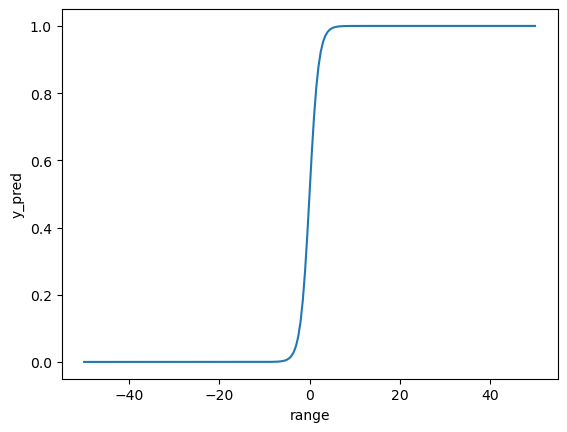

In [5]:
import matplotlib.pyplot as plt
plt.plot(xrange.numpy(),y_pred.numpy())
plt.xlabel('range')
plt.ylabel('y_pred')
plt.show()

# Logistic Regression Model via nn.Sequential



In [6]:
#let`s define a logistic regression model object that takes one-dimensional tensor as input
log_regr=torch.nn.Sequential(torch.nn.Linear(1,1),torch.nn.Sigmoid())

In [9]:
# we can check the list of model parameters using parameters() method.
print(list(log_regr.parameters()))

[Parameter containing:
tensor([[0.7645]], requires_grad=True), Parameter containing:
tensor([0.8300], requires_grad=True)]


In [11]:
# now let`s define a one-dimensional tensor x and make predictions with our logistic regression model

x=torch.tensor([[1],[2],[3],[4]],dtype=torch.float32)

In [12]:
y_pred=log_regr(x)
print('here is model prediction', y_pred)

here is model prediction tensor([[0.8313],
        [0.9137],
        [0.9579],
        [0.9799]], grad_fn=<SigmoidBackward0>)


# Custom Module for Logistic Regression

In [17]:
# build custom module for logistic regression

class LogisticRegression(torch.nn.Module):
    #build the constructor
    def __init__(self,n_inputs):
        super(LogisticRegression,self).__init__()
        self.linear=torch.nn.Linear(n_inputs,1)
        
        #make predictions
    def forward(self,x):
        y_pred=torch.sigmoid(self.linear(x))
        return y_pred

In [18]:
log_regr_cus=LogisticRegression(1)

In [19]:
y_pred=log_regr_cus(x)
print('here is model prediction',y_pred)

here is model prediction tensor([[0.4957],
        [0.4412],
        [0.3880],
        [0.3375]], grad_fn=<SigmoidBackward0>)
